In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 61.3 MB/s 


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
# Part 2 - Now let's make the ANN!

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [12]:
# Initialising the ANN
classifier = Sequential()

In [13]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [15]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [16]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 5s 7ms/step - loss: 1.3747 - accuracy: 0.7445 - val_loss: 0.9591 - val_accuracy: 0.7512
Epoch 2/50
536/536 [==============================] - 4s 7ms/step - loss: 0.7851 - accuracy: 0.7643 - val_loss: 0.5946 - val_accuracy: 0.7796
Epoch 3/50
536/536 [==============================] - 4s 8ms/step - loss: 0.5985 - accuracy: 0.7994 - val_loss: 0.5150 - val_accuracy: 0.8012
Epoch 4/50
536/536 [==============================] - 3s 5ms/step - loss: 0.5097 - accuracy: 0.7968 - val_loss: 0.4713 - val_accuracy: 0.8073
Epoch 5/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4734 - accuracy: 0.8197 - val_loss: 0.4565 - val_accuracy: 0.8175
Epoch 6/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4489 - accuracy: 0.8250 - val_loss: 0.4788 - val_accuracy: 0.8228
Epoch 7/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4332 - accuracy: 0.8322 - val_loss: 0.4480 - val_accuracy: 0.8254
Epoch 

In [18]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


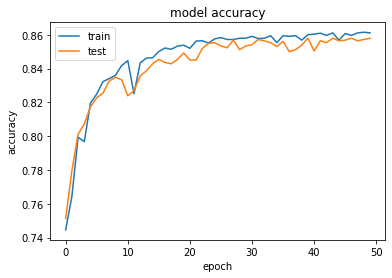

In [19]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

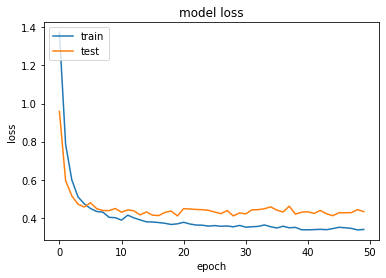

In [20]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1525,   70],
       [ 211,  194]])

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
score

0.8595